In [1]:
import numpy as np
import os
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import random
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop

from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,precision_score
import seaborn as sns
import cv2


Sources:
1. https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
2. https://github.com/anjanatiha/Pneumonia-Detection-from-Chest-X-Ray-Images-with-Deep-Learning/ 3.https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
##I added some val data 

In [2]:
from os import listdir
from os.path import isfile
def load_list(path):
    return [path+f for f in listdir(path) if isfile(path+f)]

train_normal_filename = load_list("./archive/chest_xray/train/NORMAL/")
train_pne_filename = load_list("./archive/chest_xray/train/PNEUMONIA/")

test_normal_filename = load_list("./archive/chest_xray/test/NORMAL/")
test_pne_filename = load_list("./archive/chest_xray/test/PNEUMONIA/")

val_normal_filename = load_list("./archive/chest_xray/val/NORMAL/")
val_pne_filename = load_list("./archive/chest_xray/val/PNEUMONIA/")

random.shuffle(train_normal_filename)
random.shuffle(train_pne_filename)
random.shuffle(test_normal_filename)
random.shuffle(test_pne_filename)
random.shuffle(val_normal_filename)
random.shuffle(val_pne_filename)
##For fast learning process
def cutdata(data,k):
    return data[:k]

#train_normal_filename = cutdata(train_normal_filename,10)
#train_pne_filename = cutdata(train_pne_filename,10)
#test_normal_filename = cutdata(test_normal_filename,20)
#test_pne_filename = cutdata(test_normal_filename,20)




# SHOW PIC with CV2 Library

In [3]:

img_path = val_normal_filename[0]
title = img_path.split("/")[-1]
def show(img_path,name='predict.png',title='predicttitle'):
    if os.path.isfile(img_path):

        img = cv2.imread(img_path,1)
        #print(img)
        plt.title(title)
        plt.imshow(img)

        plt.xticks([])
        plt.yticks([])
        plt.savefig(name, dpi=200)

        plt.tight_layout()
        #plt.show()
        plt.clf()
        plt.close()
show(img_path,name='test.png',title=title)

# LOAD TRAIN DATA 

In [4]:
X_train = []
y_train = []
for i in train_normal_filename:
    X_train.append(cv2.resize(cv2.imread(i,1), (150, 150)))
    y_train.append(0)
for i in train_pne_filename:
    X_train.append(cv2.resize(cv2.imread(i,1), (150, 150)))
    y_train.append(1)
print('Shape X_train', np.shape(X_train), 'Shape y', np.shape(y_train))    

Shape X_train (5168, 150, 150, 3) Shape y (5168,)


# LOAD TEST and VAL DATA

In [5]:
X_test = []
y_test = []
for i in test_normal_filename:
    X_test.append(cv2.resize(cv2.imread(i,1), (150, 150)))
    y_test.append(0)
for i in test_pne_filename:
    X_test.append(cv2.resize(cv2.imread(i,1), (150, 150)))
    y_test.append(1)
print('Shape X_test', np.shape(X_test), 'Shape y', np.shape(y_test)) 

X_val = []
y_val = []
for i in val_normal_filename:
    X_val.append(cv2.resize(cv2.imread(i,1), (150, 150)))
    y_val.append(0)
for i in val_pne_filename:
    X_val.append(cv2.resize(cv2.imread(i,1), (150, 150)))
    y_val.append(1)
print('Shape X_val', np.shape(X_val), 'Shape y', np.shape(y_val)) 

from keras import backend as K
print(K.image_data_format()) # print current format
K.set_image_data_format('channels_last') 

Shape X_test (624, 150, 150, 3) Shape y (624,)
Shape X_val (72, 150, 150, 3) Shape y (72,)
channels_last


# Preprocessing

In [16]:

scale = 1./255
X_train = np.array(X_train)*scale
X_test = np.array(X_test)*scale
X_val = np.array(X_val)*scale

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

print(np.shape(X_train[0]),np.shape(X_train[1]))
print(np.shape(X_test[0]),np.shape(X_test[1]))

print(np.shape(y_test))
#print(y_test)

(150, 150, 3) (150, 150, 3)
(150, 150, 3) (150, 150, 3)
(624,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [7]:
def get_CNN_model(input_shape):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=input_shape, data_format='channels_last'))
    model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(3,150,150)))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2 , activation='softmax'))

    print(model.summary())
    
    return model

In [8]:
print(X_train.shape)
X_train= X_train.reshape(len(X_train),150, 150, 3)
print(X_train.shape, X_train.shape[1:])

model = get_CNN_model(X_train.shape[1:])


(5168, 150, 150, 3)
(5168, 150, 150, 3) (150, 150, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
co

In [9]:
optimizer=optimizers.Adam()
loss='categorical_crossentropy'
#loss = 'binary_crossentropy'
metrics=['accuracy']
epochs = 10
batch = 16

In [10]:
model.compile(optimizer, loss=loss, metrics=metrics)


In [11]:
#y_train = y_train.reshape(-1,1)
print(y_train.shape, )

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_val_one_hot = to_categorical(y_val)

# change to [1, 0, 0,..., 0]  --> [[0, 1], [1, 0], ..., [1, 0]]
print(y_train_one_hot.shape, y_train_one_hot[-1])

modelname = 'model.h5'
if os.path.isfile(modelname)==False:
    history = model.fit(
        X_train, y_train_one_hot,
        validation_data = (X_val, y_val_one_hot),
        batch_size=batch,
        epochs=epochs,
        verbose=2,)
    model.save("model.h5")
    print('Model saved...')

else:
    model = keras.models.load_model('model.h5')
    print('Model loaded...')


(5168,)
(5168, 2) [0. 1.]
Epoch 1/10
323/323 - 116s - loss: 0.4266 - accuracy: 0.8171 - val_loss: 0.1704 - val_accuracy: 0.9444
Epoch 2/10
323/323 - 124s - loss: 0.1376 - accuracy: 0.9489 - val_loss: 1.0215 - val_accuracy: 0.7361
Epoch 3/10
323/323 - 110s - loss: 0.0972 - accuracy: 0.9661 - val_loss: 0.4512 - val_accuracy: 0.8194
Epoch 4/10
323/323 - 113s - loss: 0.0799 - accuracy: 0.9723 - val_loss: 0.9081 - val_accuracy: 0.7361
Epoch 5/10
323/323 - 113s - loss: 0.0599 - accuracy: 0.9787 - val_loss: 0.2279 - val_accuracy: 0.8889
Epoch 6/10
323/323 - 109s - loss: 0.0586 - accuracy: 0.9785 - val_loss: 0.4533 - val_accuracy: 0.8194
Epoch 7/10
323/323 - 143s - loss: 0.0467 - accuracy: 0.9843 - val_loss: 0.4241 - val_accuracy: 0.8750
Epoch 8/10
323/323 - 115s - loss: 0.0395 - accuracy: 0.9882 - val_loss: 0.0944 - val_accuracy: 0.9583
Epoch 9/10
323/323 - 107s - loss: 0.0323 - accuracy: 0.9896 - val_loss: 0.3072 - val_accuracy: 0.9167
Epoch 10/10
323/323 - 105s - loss: 0.0332 - accuracy: 0.

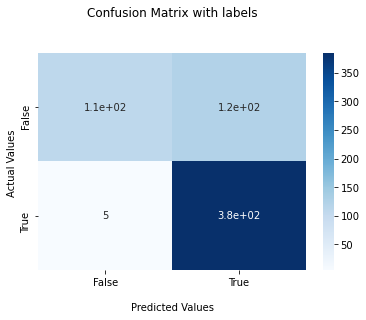

f1 0.8565072302558399 recall 0.9871794871794872 precision 0.756385068762279


In [12]:
y_pred_one = model.predict(X_test)
y_pred_binary = []

for i in y_pred_one:
    if i[1]>i[0]:
        y_pred_binary.append(1)
    else:
        y_pred_binary.append(0)


CoMa = confusion_matrix(y_test, y_pred_binary)


ax = sns.heatmap(CoMa, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

precision = precision_score(y_test, y_pred_binary) 
recall = recall_score(y_test, y_pred_binary) 
f1 = f1_score(y_test, y_pred_binary) 

print('f1',f1,'recall',recall,'precision',precision)

# PREDICTION SHOW

In [19]:
os.makedirs('outputs',exist_ok = True)
fulltest = []
fulltest.extend(test_normal_filename)
fulltest.extend(test_pne_filename)


for i in range(len(fulltest)):
    img_path = fulltest[i]
    title = img_path.split("/")[-1]

    if y_pred_binary[i]==1:
        predict_name= 'ILL'
    else:
        predict_name= 'NORMAL'

    if y_test[i]==1:
        name= 'ILL'
    else:
        name= 'NORMAL'

    show(img_path,name='outputs/'+title,title=predict_name+f'({name})')